# ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ Ï†ÑÏ≤òÎ¶¨

In [1]:
# Install
!pip install konlpy

!pip install lxml
!pip install utils
!pip install paramiko
!pip install nltk
!pip install -U genism
!pip install Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import csv
import pandas as pd
import konlpy
import sys
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.upload()

Saving ·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (1).csv
Saving ·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (1).csv
Saving ·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (1).csv
Saving ·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (1).csv
Saving ·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (1).csv


In [3]:
df1 = pd.read_csv('·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df2 = pd.read_csv('·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df3 = pd.read_csv('·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df4 = pd.read_csv('·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df5 = pd.read_csv('·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')

df1.head()

Unnamed: 0  type category  \
0           0  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
1           1  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
2           2  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
3           3  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
4           4  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   

                                              review star       date  \
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5  20.12.24.   
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5  21.06.28.   
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5  20.12.01.   
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5  21.01.07.   
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5  21.04.21.   

                                              option                        0  \
0  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greena...  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä    
1     ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    
2       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
3    ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
4  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&...      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    

                                 1    2    3  
0      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy X2  NaN  NaN  
1        ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)  NaN  NaN  
2         ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy  NaN  NaN  
3      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze  NaN  NaN  
4   ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&Downy  NaN  NaN

In [4]:
# Îç∞Ïù¥ÌÑ∞Ìï©ÏπòÍ∏∞
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

Unnamed: 0  type category  \
0           0  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
1           1  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
2           2  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
3           3  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
4           4  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   

                                              review star       date  \
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5  20.12.24.   
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5  21.06.28.   
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5  20.12.01.   
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5  21.01.07.   
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5  21.04.21.   

                                              option                        0  \
0  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greena...  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä    
1     ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    
2       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
3    ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
4  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&...      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    

                                 1    2    3    4    5    6    7    8  
0      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy X2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1        ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&Downy  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [5]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îßå Î≥¥Í∏∞
df = df[['review','star']]
df

review star
0     Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5
1     3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5
2     ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5
3     ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5
4     ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5
...                                                 ...  ...
3351                        ÎÉÑÏÉàÍ∞Ä Î∞ïÏπ¥Ïä§ÎÉÑÏÉàÎπÑÏä∑ÌïòÎÑ§Ïöî;; Îã§Î•∏Ìñ•ÏùÄ Ï¢ãÍ≤üÏ£†;;  ÌèâÏ†ê1
3352  ÌõÑÍ∏∞Ï¢ãÏïÑÏÑú ÌíçÏûêÎãòÎØøÍ≥† Íµ¨Îß§ÌñàÎäîÎç∞ Ï†úÏä§ÌÉàÏùÄ\nÏïÑÎãàÎÑ§Ïöî Ìñ•ÎëêÍ∞ú Í≥®Í≥†Î£®ÏÉÄÎäîÎç∞ ÎëòÎã§‚Ä¶Ïãº Ìñ•...  ÌèâÏ†ê1
3353  Í¥ëÍ≥†Î•º ÎÑàÎ¨¥Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥§ÎäîÎç∞ Ïó≠ÏãúÎÇò..Îòê ÎãπÌñà‚Ä¶\nÎÑàÎ¨¥ ÌïòÎÑ§‚Ä¶Í∑ºÏ≤òÏóêÏÑúÎèÑ Ìñ•Ïù¥ ÎäêÍª¥ÏßÄ...  ÌèâÏ†ê1
3354  ÏïàÎ∞© ÌïòÎÇò Í±∞Ïã§ ÌïòÎÇò ÎíÄÍ≥† ÌïúÎã¨ÎèÑ ÏïàÎêêÎäîÎç∞ Ï†ÄÎ†áÍ≤å Ï§ÑÏñ¥ÏûàÍ≥† ÎÉÑÏÉà ÌïòÎÇòÎèÑ Ïïà ÎÇòÏö© ÌíÄ...  ÌèâÏ†ê1
3355                      ÏßÑÏßú ÏôÑÏ†Ñ Î≥ÑÎ°ú Ïú†Ìà¨Î∏å Î≥¥Í≥† ÏÇ∞Í±¥Îç∞ ÏßÑÏßú ÌõÑÌöå ÌñàÏñ¥Ïöî  ÌèâÏ†ê1

[19519 rows x 2 columns]

In [6]:
# ÌèâÏ†êÎ≥ÑÎ°ú ÎÇòÎàÑÍ∏∞

df5 = df[df['star'] == 'ÌèâÏ†ê5']
df4 = df[df['star'] == 'ÌèâÏ†ê4']
df3 = df[df['star'] == 'ÌèâÏ†ê3']
df2 = df[df['star'] == 'ÌèâÏ†ê2']
df1 = df[df['star'] == 'ÌèâÏ†ê1']

df5.head()

review star
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5

In [7]:
# review Îç∞Ïù¥ÌÑ∞Îßå Î≥¥Í∏∞
df5_score = df5[['review']]
df4_score = df4[['review']]
df3_score = df3[['review']]
df2_score = df2[['review']]
df1_score = df1[['review']]

df5_score.head()

review
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...



---


In [8]:
import string
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
from gensim.models import Word2Vec

#1Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ


In [9]:
df1_score['review'] = df1_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df1_score['review'] = df1_score['review'].apply(lambda x: nouns(x))

df1_score['review'].head(3)

<ipython-input-9-0324e8db13d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_score['review'] = df1_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-9-0324e8db13d9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_score['review'] = df1_score['review'].apply(lambda x: nouns(x))


5622    [ÎîîÌì®Ï†∏, ÏïÑÎûò, Î†àÍ≥†, Î∞úÏÉù, Ïùº, Î†àÍ≥†, ÏßÅÏ†ë, ÎîîÌì®Ï†∏Í∞ÄÌäÑ, Î∂ÄÎ∂Ñ, Î†àÍ≥†, Î™®Îëê...
5623    [Ï†úÎ™©, Í∞úÏΩî, Ïàò, Îîî, Ìì®Ï†Ä, Î∞úÌñ•, Îîî, Ìì®Ï†Ä, Ï≤òÏùå, Î¶¨Îìú, Ïä§Ìã±, Í∞ú, Ìñ•...
5624    [ÎëêÎ≤àÏß∏, Ìñ•, Íµ¨Îß§, ÏßÑÏßú, Ìñ•, ÏûêÏ≤¥, Ï≤òÏùå, Íµ¨Îß§, Îïå, Í∞ÄÍ≤©, Ïù∏ÏÉÅ, Í∑∏Í±∞,...
Name: review, dtype: object

In [10]:
df1_score.to_csv('token_1.txt')

In [11]:
#1Ï†ê_ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

count_1 = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
for line in open('token_1.txt'):
    words = list(set(line.split()))   #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count_1[c, d] = count_1.get((c, d), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #indexÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥ÑÏÜç Ï§ëÏ≤©Ìï¥ÏÑú listÏóê ÎÑ£ÎäîÎã§ 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas Ïù¥Ïö©Ìï¥ÏÑú dfÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞ 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#Î∂àÏö©Ïñ¥Ï†úÍ±∞
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#ÌïúÍ∏ÄÏûê Îã®Ïñ¥ ÏÇ≠Ï†ú
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#Ïù∏Îç±Ïä§Ï¥àÍ∏∞Ìôî
df2 = df2.reset_index(drop=True)

#Ïª¨ÎüºÌï©ÏπòÍ∏∞
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_1_Final = df2[['term','freq']]
df_1_Final

term  freq
0              Î®∏Î¶¨  , ÎÉÑÏÉà     108
1              ÏïàÏ†Ñ  , Î†àÍ≥†      94
2              Í±∞Ïùò  , Í∞ïÎèÑ      91
3             ÎÉÑÏÉà  , Í∞ÄÍπåÏù¥      88
4              ÎÉÑÏÉà  , Íµ¨Îß§      83
...                   ...   ...
15909         ÎÉÑÏÉà  , ÎÇ¥Ïö©Î¨º       1
15910         Ïï°Ï≤¥  , ÎëêÎ≤àÏß∏       1
15911         Ïï°Ï≤¥  , ÎÇ¥Ïö©Î¨º       1
15912         ÏÉâÍπî  , ÎëêÎ≤àÏß∏       1
15913  3355    ÏßÑÏßú  , Î≥ÑÎ°ú       1

[15914 rows x 2 columns]

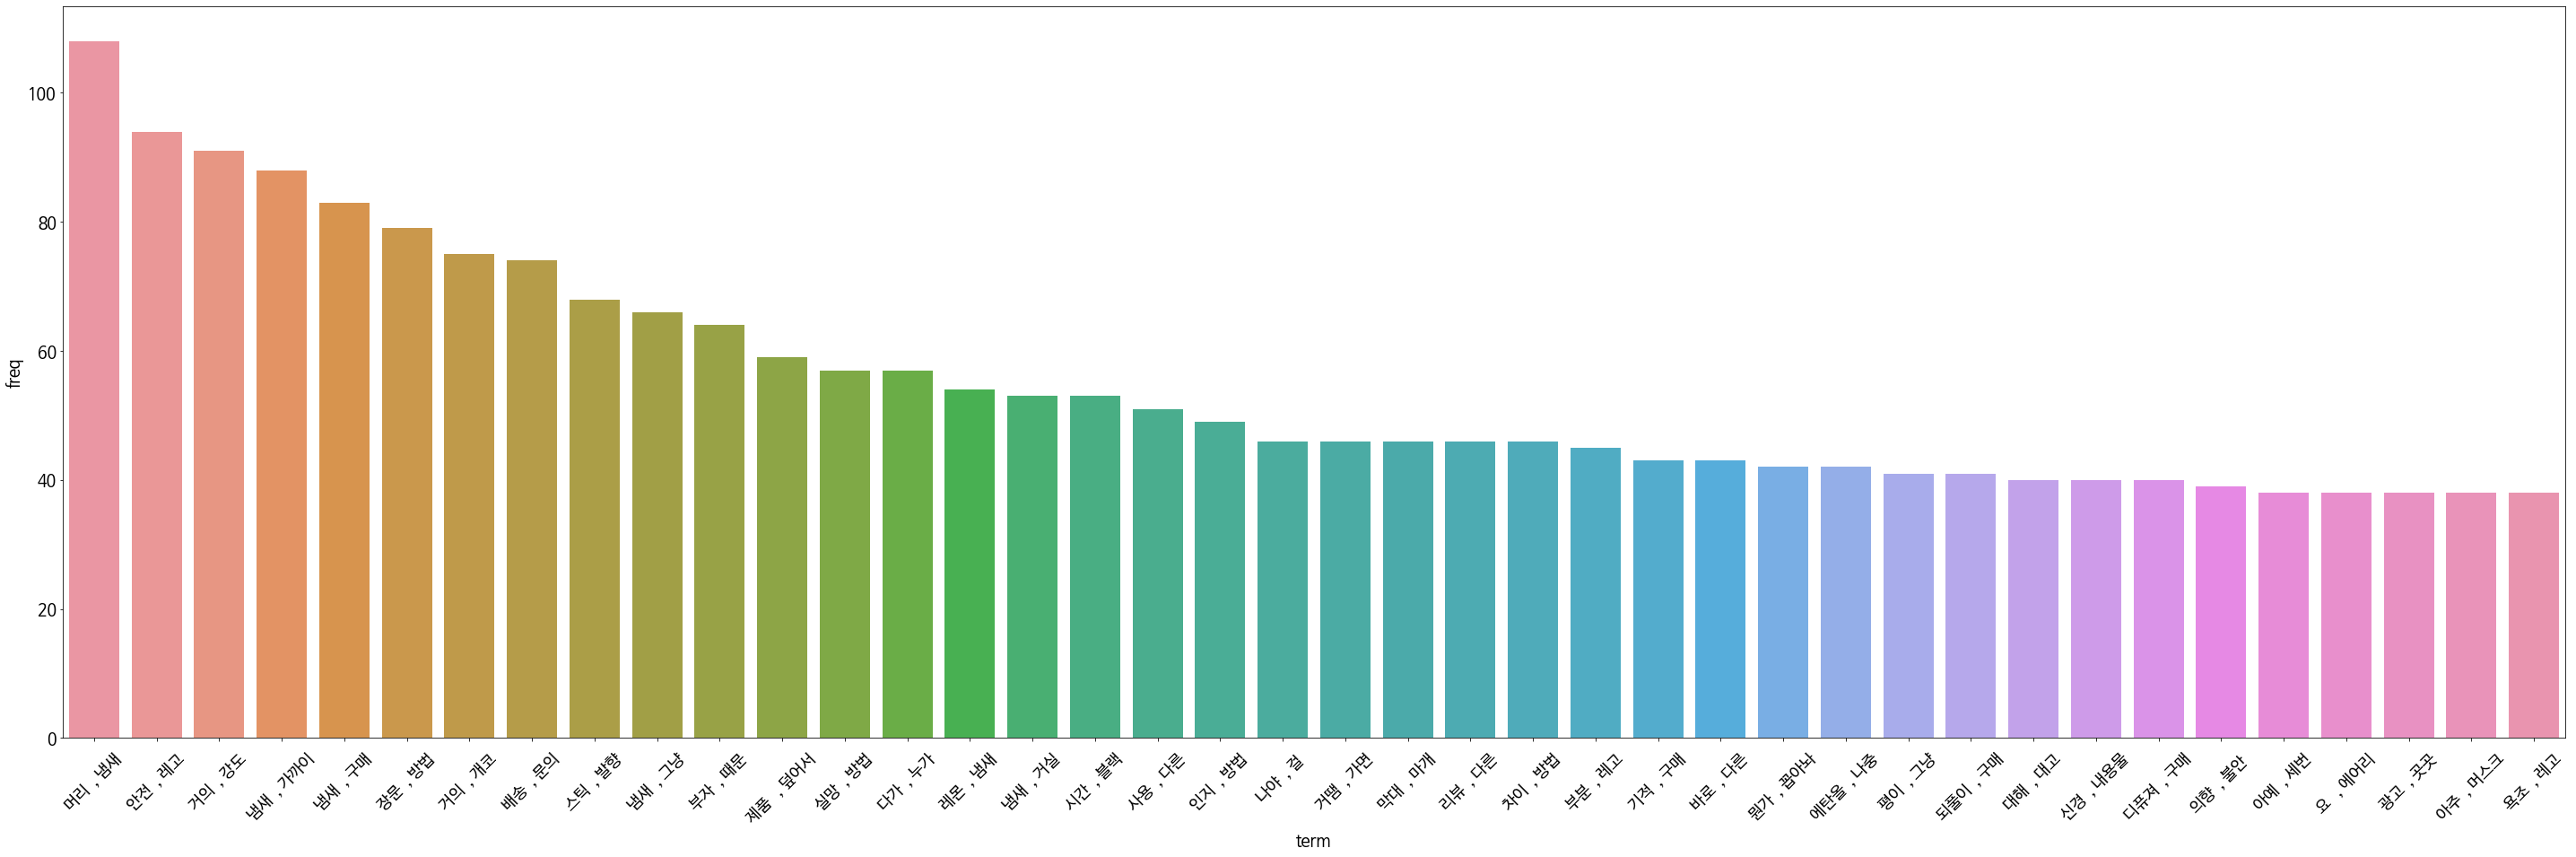

In [39]:
# 1Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ ÏãúÍ∞ÅÌôî

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_1_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#2Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

In [12]:
df2_score['review'] = df2_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df2_score['review'] = df2_score['review'].apply(lambda x: nouns(x))

df2_score['review'].head(3)

5212    [Ìè¨Î†àÏä§Ìä∏, Ïõå, Ìñ•, ÏßÑÏßú, Ï†Ñ, Íµ¨Îß§, Îïå, ÏóêÏñ¥Î¶¨, Îçò, Ï≤ò, ÏÜù, Íµ¨Îß§, Ïù¥...
5213    [ÏõêÎûò, ÎîîÌì®Ï†∏, Ï†ú, ÏÇ¨Ïö©, Ï£ºÎ¨∏, ÏùºÎã®, Ìñ•, Îã®Ï°∞, Í≥ÑÏÜç, Ìñ•, ÏÇ¨Îûå, ÎëêÌÜµ,...
5214    [Ïûê, ÌõÑÍ∏∞, Î≥¥Í≥†, Í∞ÄÏßÄ, Íµ¨ÏûÖ, Í∞ÅÏûê, Ï∑®Ìñ•, Í∏Ä, Î≥¥Í≥†, Ïù∏, ÏÑºÏä§, Ïö∞Îìú, ...
Name: review, dtype: object

In [13]:
df2_score.to_csv('token_2.txt')

In [14]:
#2Ï†ê_ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

count_1 = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
for line in open('token_2.txt'):
    words = list(set(line.split()))   #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count_1[c, d] = count_1.get((c, d), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #indexÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥ÑÏÜç Ï§ëÏ≤©Ìï¥ÏÑú listÏóê ÎÑ£ÎäîÎã§ 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas Ïù¥Ïö©Ìï¥ÏÑú dfÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞ 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#Î∂àÏö©Ïñ¥Ï†úÍ±∞
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#ÌïúÍ∏ÄÏûê Îã®Ïñ¥ ÏÇ≠Ï†ú
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#Ïù∏Îç±Ïä§Ï¥àÍ∏∞Ìôî
df2 = df2.reset_index(drop=True)

#Ïª¨ÎüºÌï©ÏπòÍ∏∞
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_2_Final = df2[['term','freq']]
df_2_Final

term  freq
0              ÌçºÌîå  , ÌÜµÌãÄÏñ¥      72
1               Í∏∞ÎåÄ  , Íµ¨Îß§      63
2               Ïò§Ìîà  , ÎåÄÌïú      50
3               ÎÉÑÏÉà  , Íµ¨Îß§      49
4              ÎÉÑÏÉà  , Í∞ÄÍπåÏù¥      47
...                    ...   ...
12424           ÎåÄÎ°ú  , Íµ¨Îß§       1
12425  5366    Ï≤òÏùå  , Ï†ïÎèÑ        1
12426   5366    Ï≤òÏùå  , ÏÑ†Î¨º       1
12427   5366    Ï≤òÏùå  , ÏòàÏ†Ñ       1
12428          Ïò§Ìîà  , Í∑∏ÎÉ•        1

[12429 rows x 2 columns]

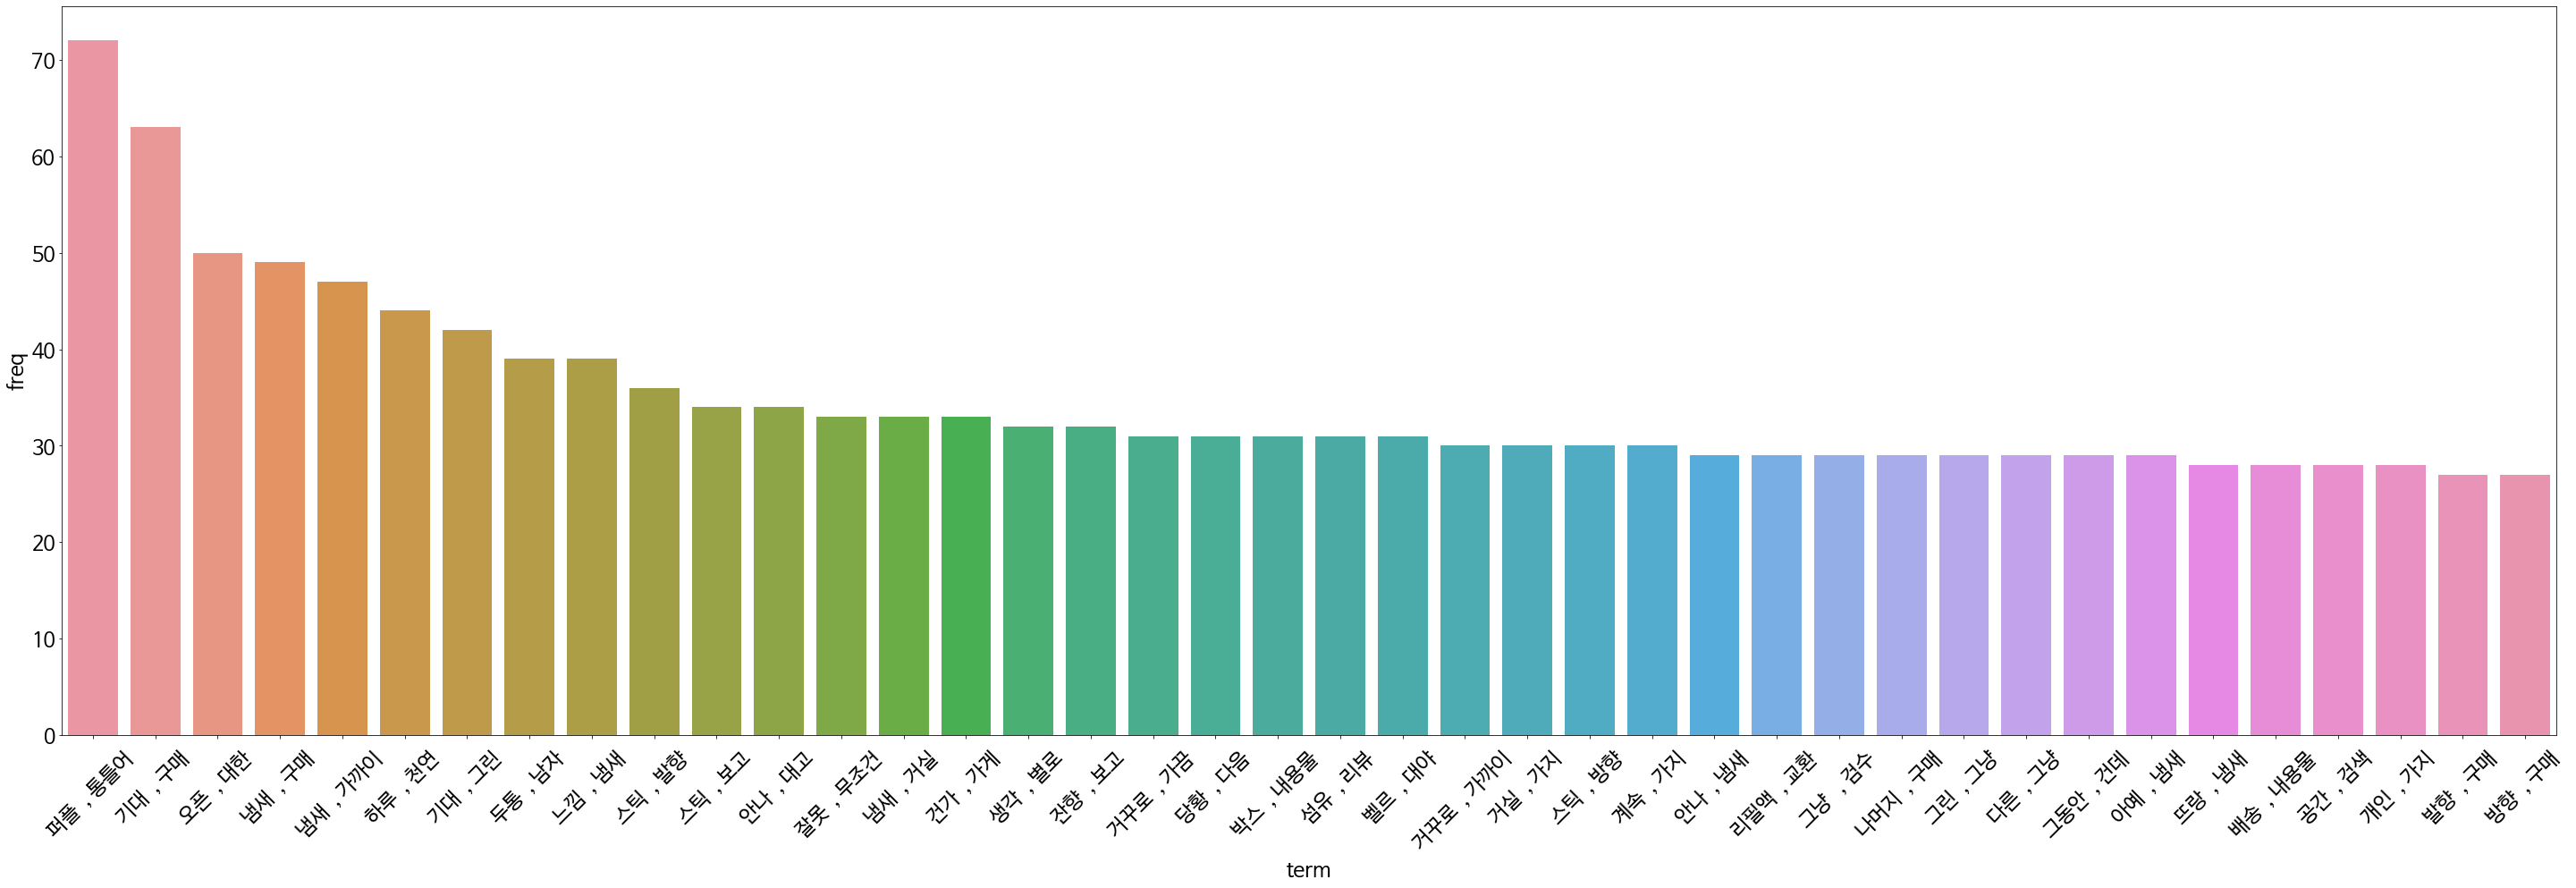

In [40]:
# 2Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ ÏãúÍ∞ÅÌôî

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_2_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#3Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

In [15]:
df3_score['review'] = df3_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df3_score['review'] = df3_score['review'].apply(lambda x: nouns(x))

df3_score['review'].head(3)

<ipython-input-15-e26cff656318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_score['review'] = df3_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-15-e26cff656318>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_score['review'] = df3_score['review'].apply(lambda x: nouns(x))


3644    [Ï†Ä, Ìñ•Í∏∞, ÏòàÎØº, ÌïúÌé∏, ÌèâÏÜå, ÍΩÉÌñ•, Í∞ÄÎì†, Ìñ•, ÎπÑÎàÑ, Ìñ•, Ïù∏ÌÑ∞ÎÑ∑, Íµ¨Îß§,...
3645    [Ï†Ä, Ïò§ÏÖò, Î∏åÎ¶¨Ï¶à, Ïù¥Î¶Ñ, ÌÇ§, Ï∫îÎì§, ÌÅ¨ÏÉåÎìú, Î∞îÎßà, Î∏åÎ¶¨Ï¶à, ÏÉùÍ∞Å, Í∑∏, Îã¨...
3646    [Ï†ú, ÌïòÎ£®, Ï¢ÖÏùº, Î¨∏, Ìñ•, Ï≤òÏùåÏ≤òÎüº, Í∑∏Î¶∞, ÏóêÏñ¥Î¶¨, Ìñ•, ÏµúÍ≥†, Í∑∏Î¶∞, ÏóêÏñ¥...
Name: review, dtype: object

In [16]:
df3_score.to_csv('token_3.txt')

In [17]:
#3Ï†ê_ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

count_1 = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
for line in open('token_3.txt'):
    words = list(set(line.split()))   #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count_1[c, d] = count_1.get((c, d), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #indexÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥ÑÏÜç Ï§ëÏ≤©Ìï¥ÏÑú listÏóê ÎÑ£ÎäîÎã§ 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas Ïù¥Ïö©Ìï¥ÏÑú dfÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞ 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#Î∂àÏö©Ïñ¥Ï†úÍ±∞
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#ÌïúÍ∏ÄÏûê Îã®Ïñ¥ ÏÇ≠Ï†ú
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#Ïù∏Îç±Ïä§Ï¥àÍ∏∞Ìôî
df2 = df2.reset_index(drop=True)

#Ïª¨ÎüºÌï©ÏπòÍ∏∞
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_3_Final = df2[['term','freq']]
df_3_Final

term  freq
0             Ïò¥Í≤®  , Ïã†Î∞úÏû•     264
1              ÎÉÑÏÉà  , Í∑∏Î¶∞     149
2              Í∑∏Î¶∞  , Íµ¨Îß§     145
3             ÏóêÏñ¥Î¶¨  , Í∑∏Î¶∞     122
4              Í∏∞Ï°¥  , Íµ¨Îß§     104
...                   ...   ...
33942  4840    Ìñ•  , Ìé∏Ïù¥        1
33943         Î∞©Ìñ•ÏÑ±  , Í∞ÄÏÑ±       1
33944   4839    Ìñ•  , Í∞ÄÏÑ±       1
33945  4839    Ìñ•  , Î∞©Ìñ•ÏÑ±       1
33946          Ï≤´ÎÇ†  , Ïô∏Ï∂ú       1

[33947 rows x 2 columns]

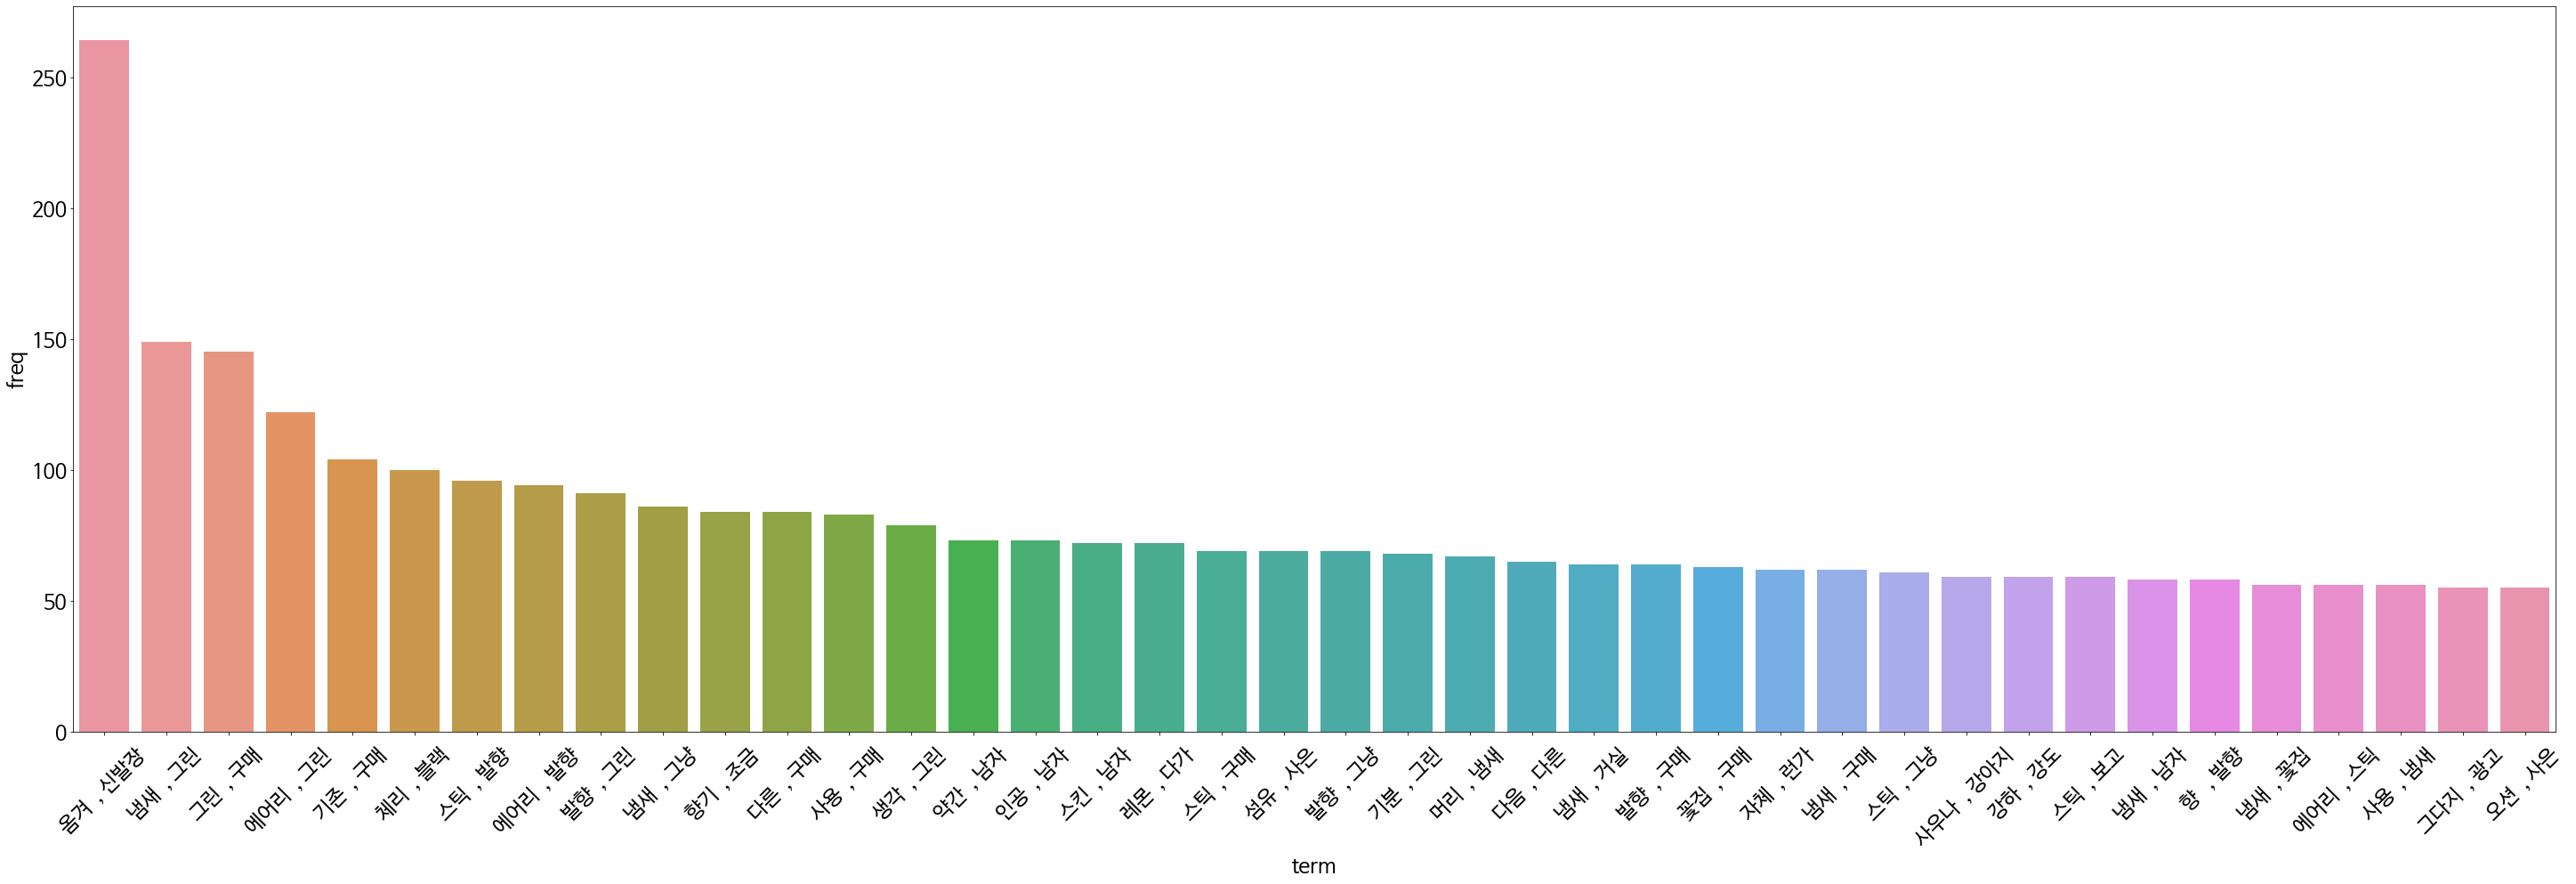

In [41]:
# 3Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ ÏãúÍ∞ÅÌôî

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_3_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#4Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

In [18]:
df4_score['review'] = df4_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df4_score['review'] = df4_score['review'].apply(lambda x: nouns(x))

df4_score['review'].head(3)

<ipython-input-18-3081c7181b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_score['review'] = df4_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-18-3081c7181b67>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_score['review'] = df4_score['review'].apply(lambda x: nouns(x))


2004    [ÏóêÏù¥, ÏÑºÌä∏, ÌåêÎß§, Î∂Ñ, ÏÑºÏä§, Ï†ïÎßê, Í≤É, Ï£ºÎ¨∏, Îïå, ÏÑ†Î¨º, Íæ∏Îü¨ÎØ∏, Ïò§Ìîà,...
2005    [Ï≤ò, ÏÜùÏÉ§Ïõå, ÌõÑ, ÎÉÑÏÉà, ÎèÑÎ∏åÌñ•, ÎπÑÏä∑, ÏÜê, ÏÜê, Í∏∞Î∂Ñ, Í∑∏Î¶∞, ÏóêÏñ¥Î¶¨, ÍΩÉ,...
2006    [ÏóêÏù¥, ÏÑºÌä∏, ÌåêÎß§, Î∂Ñ, ÏÑºÏä§, Ï†ïÎßê, Í≤É, Ï£ºÎ¨∏, Îïå, ÏÑ†Î¨º, Íæ∏Îü¨ÎØ∏, Ïò§Ìîà,...
Name: review, dtype: object

In [19]:
df4_score.to_csv('token_4.txt')

In [20]:
#4Ï†ê_ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

count_1 = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
for line in open('token_4.txt'):
    words = list(set(line.split()))   #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count_1[c, d] = count_1.get((c, d), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #indexÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥ÑÏÜç Ï§ëÏ≤©Ìï¥ÏÑú listÏóê ÎÑ£ÎäîÎã§ 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas Ïù¥Ïö©Ìï¥ÏÑú dfÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞ 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#Î∂àÏö©Ïñ¥Ï†úÍ±∞
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#ÌïúÍ∏ÄÏûê Îã®Ïñ¥ ÏÇ≠Ï†ú
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#Ïù∏Îç±Ïä§Ï¥àÍ∏∞Ìôî
df2 = df2.reset_index(drop=True)

#Ïª¨ÎüºÌï©ÏπòÍ∏∞
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_4_Final = df2[['term','freq']]
df_4_Final

term  freq
0              ÎÉÑÏÉà  , Í∑∏Î¶∞     470
1              Í∑∏Î¶∞  , Íµ¨Îß§     469
2             ÏóêÏñ¥Î¶¨  , Í∑∏Î¶∞     398
3              Ìñ•   , Ï°∞Í∏à     391
4              Í∏∞Ï°¥  , Í∑∏ÎÉ•     353
...                   ...   ...
89116  2625    Ï≤òÏùå  , ÏßÄÏù∏       1
89117          Ï†úÌíà  , Í∞àÏÉâ       1
89118         ÏûÖÍµ¨  , Í∞ÄÍπåÏù¥       1
89119          ÏûÖÍµ¨  , ÏàòÎ©¥       1
89120          ÏûÖÍµ¨  , Î©ÄÎ¶¨       1

[89121 rows x 2 columns]

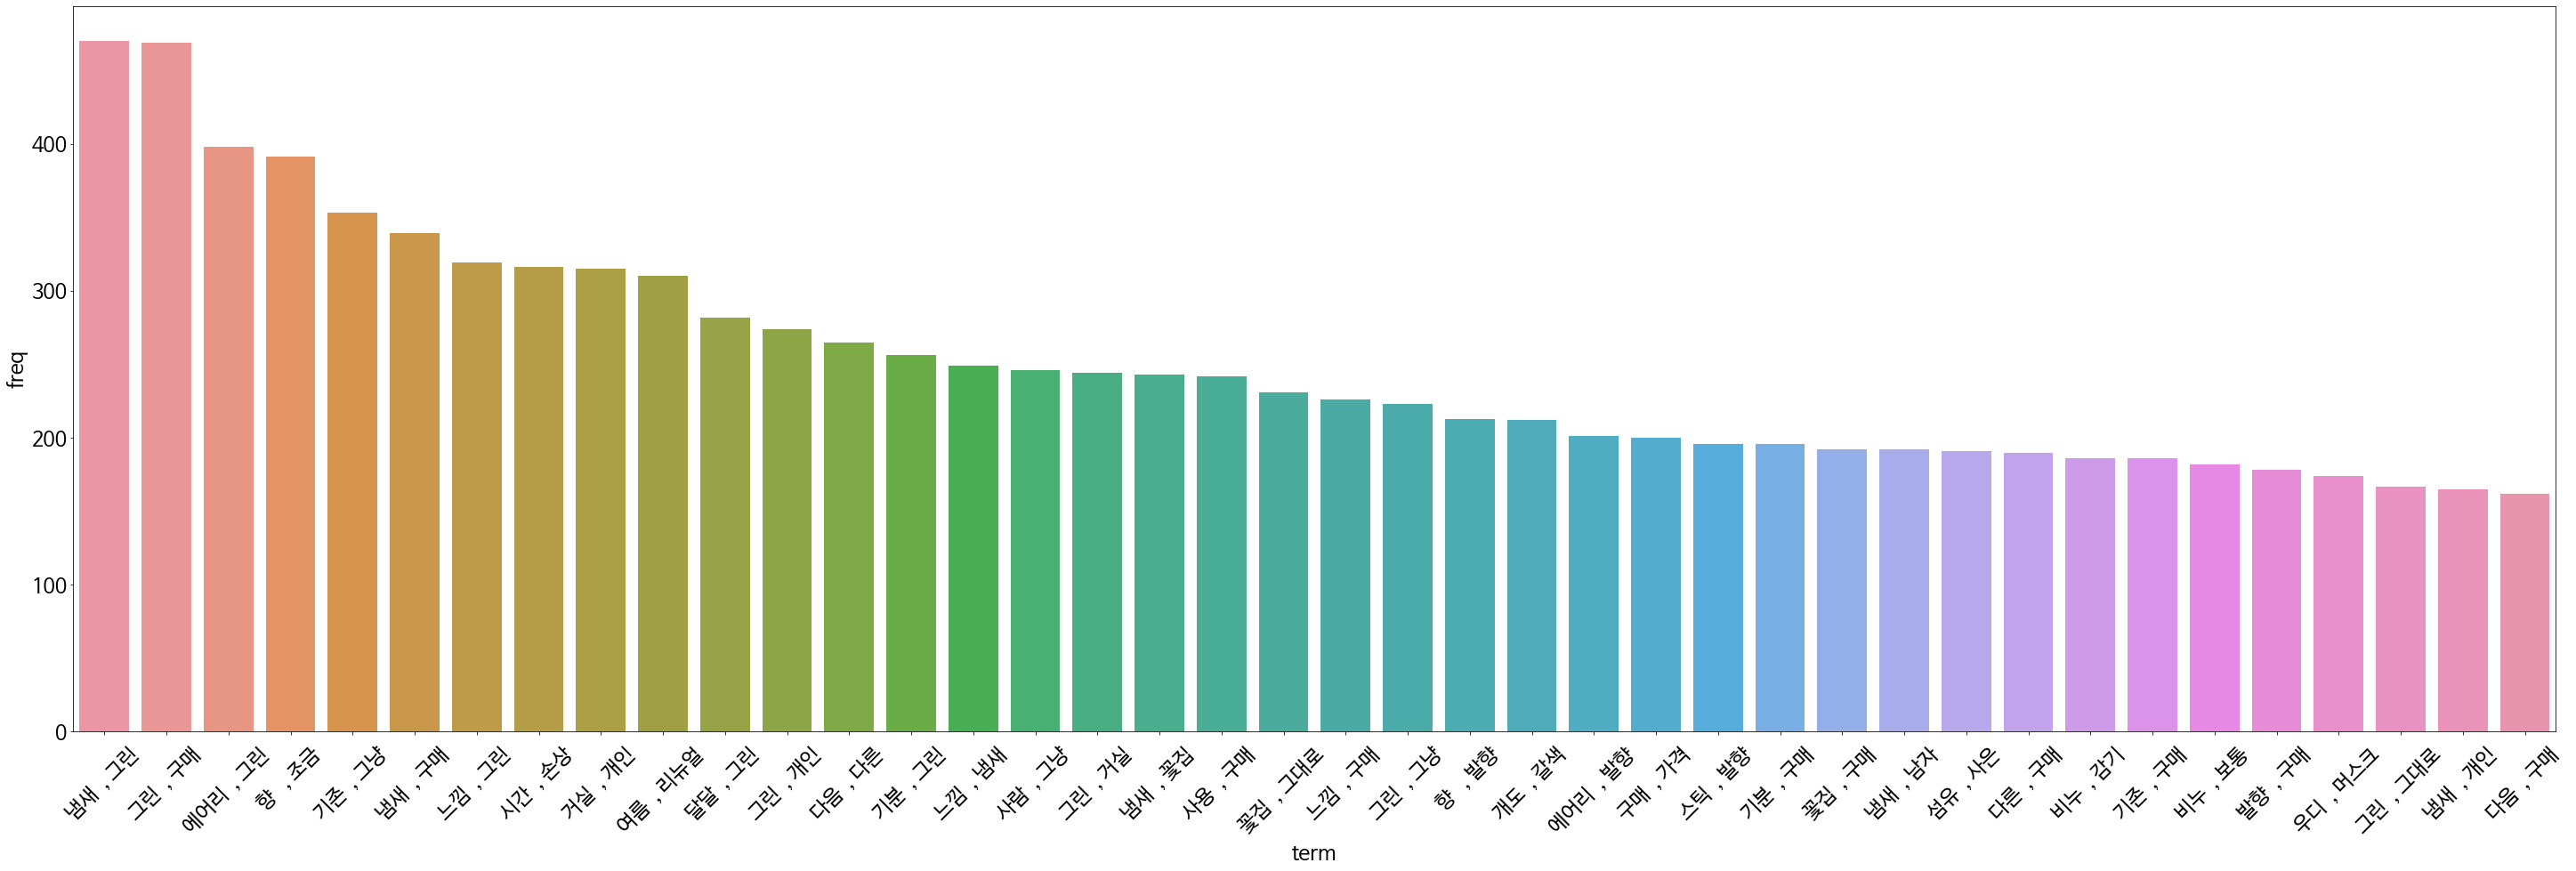

In [42]:
# 4Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ ÏãúÍ∞ÅÌôî

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_4_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#5Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

In [21]:
df5_score['review'] = df5_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df5_score['review'] = df5_score['review'].apply(lambda x: nouns(x))

df5_score['review'].head(3)

<ipython-input-21-f8c492ab208e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_score['review'] = df5_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-21-f8c492ab208e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_score['review'] = df5_score['review'].apply(lambda x: nouns(x))


0    [Î∞±Ìï©, Ìä§Î¶Ω, Ïû•ÎØ∏, Ìñ•, Î¨¥Ï°∞Í±¥, Í∑∏Î¶∞, ÏóêÏñ¥Î¶¨, Ï†ú, Í∑∏Î¶∞, ÏóêÏñ¥Î¶¨, Î≤åÏç®, ...
1    [Í∞úÍµ¨, Îß§Ìïò, Í∞ú, ÏÑúÎπÑÏä§, Íµ¨Ìï¥, Ïö•, ÌèâÏÜå, ÏóêÎîî, Ìì®Ï†Ä, Î∞±ÌôîÏ†ê, ÏÇ¨ÏÑú, Ïóê...
2    [ÎèÑÎåÄÏ≤¥, Ïôú, Ïù¥Ï†ú, Ïù¥, Ï†úÌíà, Ïïå, ÎêúÍ±∞, Ïôú, Í∑∏ÎèôÏïà, ÏïÑÎ¨¥, ÎÇò, Í±∞, Ïïà...
Name: review, dtype: object

In [22]:
df5_score.to_csv('token_5.txt')

In [23]:
#5Ï†ê_ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ

count_1 = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
for line in open('token_5.txt'):
    words = list(set(line.split()))   #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count_1[c, d] = count_1.get((c, d), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #indexÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥ÑÏÜç Ï§ëÏ≤©Ìï¥ÏÑú listÏóê ÎÑ£ÎäîÎã§ 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas Ïù¥Ïö©Ìï¥ÏÑú dfÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞ 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#Î∂àÏö©Ïñ¥Ï†úÍ±∞
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#ÌïúÍ∏ÄÏûê Îã®Ïñ¥ ÏÇ≠Ï†ú
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#Ïù∏Îç±Ïä§Ï¥àÍ∏∞Ìôî
df2 = df2.reset_index(drop=True)

#Ïª¨ÎüºÌï©ÏπòÍ∏∞
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_5_Final = df2[['term','freq']]
df_5_Final

term  freq
0              Í∑∏Î¶∞  , Íµ¨Îß§    3626
1              ÍΩÉÏßë  , Íµ¨Îß§    3221
2              ÎÉÑÏÉà  , Í∑∏Î¶∞    2704
3              ÎÉÑÏÉà  , Íµ¨Îß§    2556
4              ÎäêÎÇå  , Í∑∏Î¶∞    2448
...                   ...   ...
425815        ÌÉÄÏù¥Î∞ç  , ÎßàÏùå       1
425816        ÌÉÄÏù¥Î∞ç  , Ïã†ÏÉÅ       1
425817       ÌÉÄÏù¥Î∞ç  , ÎìúÎ†àÏä§       1
425818        ÌÉÄÏù¥Î∞ç  , Ïã¨Ìîå       1
425819  467    ÏÉÅÏûê  , ÏãúÍ∞Ñ       1

[425820 rows x 2 columns]

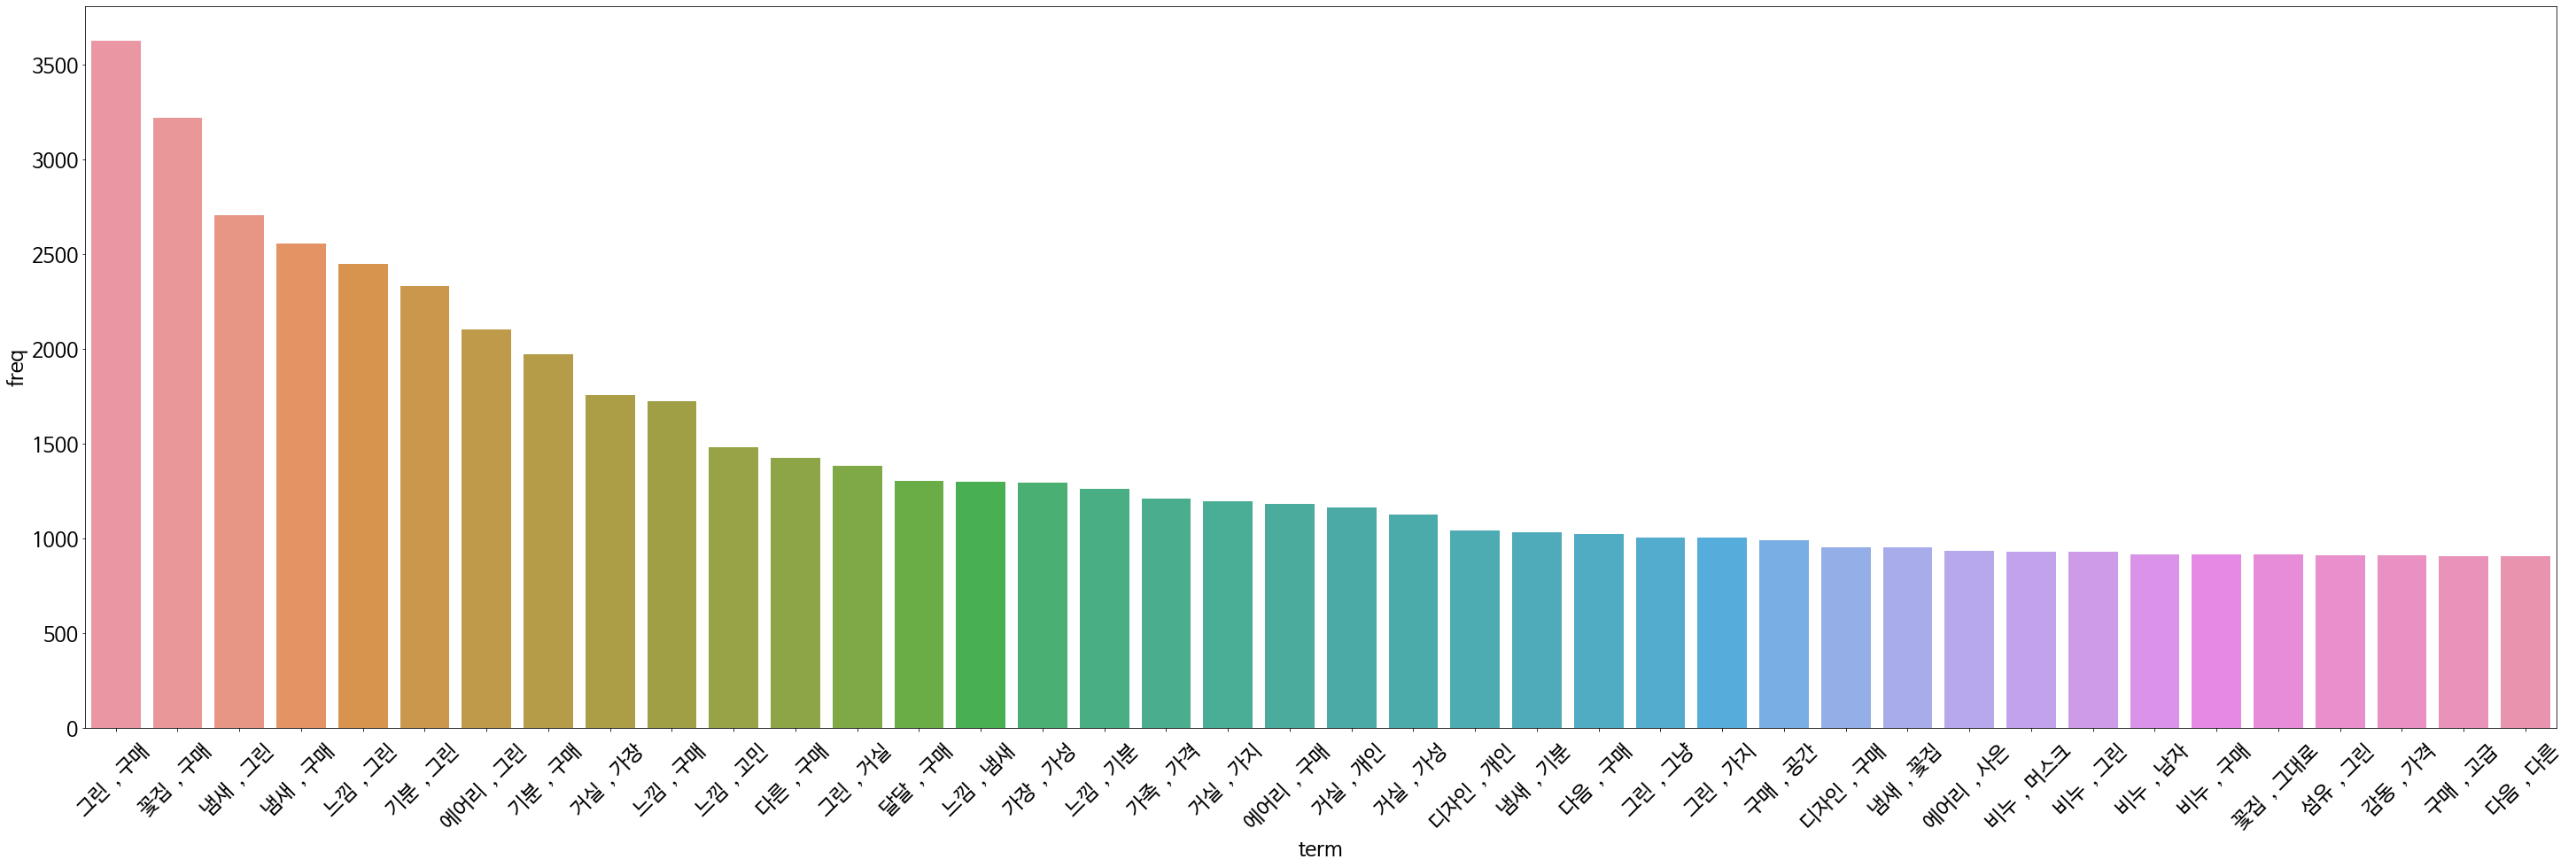

In [43]:
# 5Ï†ê ÎèôÏãúÏ∂úÌòÑÎπàÎèÑ ÏãúÍ∞ÅÌôî

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_5_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()